In [2]:
#installations
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

2023-11-07 18:52:55.510934: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [3]:
#grabbing the mnist dataset
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [4]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [5]:
#building the model
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

2023-11-07 18:53:03.108831: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
sgd = SGD(0.01)
epochs=10
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=epochs, batch_size=128)

Epoch 1/10
469/469 [==============================] - 42s 89ms/step - loss: 2.2783 - accuracy: 0.1785 - val_loss: 2.2488 - val_accuracy: 0.2922
Epoch 2/10
469/469 [==============================] - 39s 84ms/step - loss: 2.2220 - accuracy: 0.3370 - val_loss: 2.1889 - val_accuracy: 0.3931
Epoch 3/10
469/469 [==============================] - 39s 84ms/step - loss: 2.1535 - accuracy: 0.4630 - val_loss: 2.1067 - val_accuracy: 0.5213
Epoch 4/10
469/469 [==============================] - 39s 83ms/step - loss: 2.0563 - accuracy: 0.5412 - val_loss: 1.9892 - val_accuracy: 0.5899
Epoch 5/10
469/469 [==============================] - 37s 79ms/step - loss: 1.9219 - accuracy: 0.5903 - val_loss: 1.8335 - val_accuracy: 0.6156
Epoch 6/10
469/469 [==============================] - 40s 86ms/step - loss: 1.7538 - accuracy: 0.6286 - val_loss: 1.6512 - val_accuracy: 0.6568
Epoch 7/10
469/469 [==============================] - 38s 82ms/step - loss: 1.5689 - accuracy: 0.6587 - val_loss: 1.4642 - val_accuracy:

In [7]:
#making the predictions
predictions = model.predict(X_test, batch_size=128)
print(classification_report(Y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

79/79 [==============================] - 4s 45ms/step
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       980
           1       0.76      0.99      0.86      1135
           2       0.79      0.65      0.71      1032
           3       0.63      0.87      0.73      1010
           4       0.69      0.78      0.73       982
           5       0.81      0.49      0.61       892
           6       0.82      0.87      0.84       958
           7       0.72      0.86      0.78      1028
           8       0.86      0.46      0.60       974
           9       0.74      0.53      0.61      1009

    accuracy                           0.75     10000
   macro avg       0.76      0.74      0.74     10000
weighted avg       0.76      0.75      0.74     10000



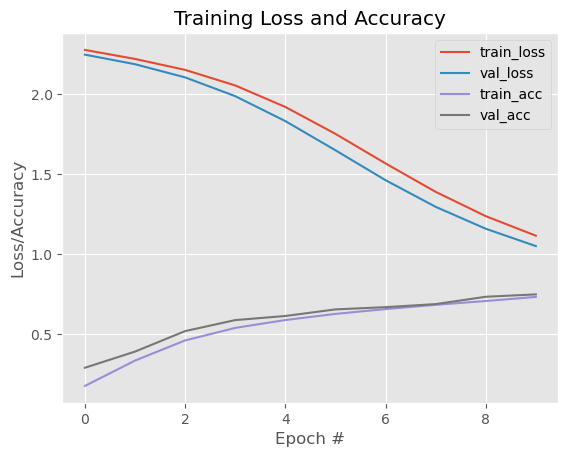

In [8]:
#plotting the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()